In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest,f_classif
import pickle

In [8]:
df= pd.read_csv('modefied1.csv')

In [9]:
df.shape

(24691, 10)

In [10]:
df.head()

,Pos,Age,MP,FG,FGA,FG%,PTS,height,weight,PER
0,G-F,31.0,NaN,144.0,516.0,0.279,458.0,180.0,77.0,NaN
1,SG,29.0,NaN,102.0,274.0,0.372,279.0,188.0,83.0,NaN
2,SF,25.0,NaN,174.0,499.0,0.349,438.0,193.0,86.0,NaN
3,F,24.0,NaN,22.0,86.0,0.256,63.0,196.0,88.0,NaN
4,F,24.0,NaN,21.0,82.0,0.256,59.0,196.0,88.0,NaN


In [11]:
df.sample(5)

,Pos,Age,MP,FG,FGA,FG%,PTS,height,weight,PER
18123,C,24.0,590.0,53.0,123.0,0.431,147.0,208.0,113.0,9.5
13257,PG,24.0,1048.0,141.0,359.0,0.393,414.0,190.0,90.0,12.1
8815,SF,30.0,1334.0,109.0,287.0,0.380,350.0,201.0,83.0,8.2
10017,PF,26.0,18.0,4.0,4.0,1.000,8.0,208.0,104.0,26.4
19604,PG,33.0,1970.0,330.0,794.0,0.416,939.0,183.0,74.0,15.9


In [12]:
df.isnull().sum()

,0
Pos,67
Age,75
MP,553
FG,67
FGA,67
FG%,166
PTS,67
height,67
weight,67
PER,590


In [13]:
df.dropna(inplace=True)

In [14]:
df = df.astype({'Age': 'int','MP': 'int','FG': 'int','FGA': 'int','PTS': 'int','height': 'int','weight': 'int'})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23999 entries, 488 to 24690
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     23999 non-null  object 
 1   Age     23999 non-null  int64  
 2   MP      23999 non-null  int64  
 3   FG      23999 non-null  int64  
 4   FGA     23999 non-null  int64  
 5   FG%     23999 non-null  float64
 6   PTS     23999 non-null  int64  
 7   height  23999 non-null  int64  
 8   weight  23999 non-null  int64  
 9   PER     23999 non-null  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 2.0+ MB


In [16]:
df.describe()

,Age,MP,FG,FGA,FG%,PTS,height,weight,PER
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.00000,23999.000000,23999.000000,23999.000000,23999.000000
mean,26.675528,1215.253677,197.745656,434.116547,0.43311,515.878453,199.569649,95.680403,12.528468
std,3.857407,940.031200,189.109300,399.222853,0.09497,495.432184,9.336656,12.041803,5.909755
min,18.000000,1.000000,0.000000,1.000000,0.00000,0.000000,160.000000,60.000000,-90.600000
25%,24.000000,348.000000,42.000000,101.000000,0.39600,109.000000,193.000000,86.000000,9.900000
50%,26.000000,1061.000000,143.000000,325.000000,0.44000,372.000000,201.000000,95.000000,12.700000
75%,29.000000,1974.500000,303.000000,667.000000,0.48100,787.000000,206.000000,104.000000,15.600000
max,44.000000,3882.000000,1597.000000,3159.000000,1.00000,4029.000000,231.000000,163.000000,129.100000


## here you can see our data having a collection of the days means some player add long day performance(means a few days).
## pts is point to goal or win the matchs like ex- 1 point for 1 goal and also this was may vary according the sports
## there is problem in the per column because they are the going out of range so we arrange them into between in 0 to 100.(there is not problem in this because this rating show a player how much good they are play.)



In [17]:
df.duplicated().sum()

0

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.corr( numeric_only= True)['PER']

,PER
Age,0.010573
MP,0.512963
FG,0.571111
FGA,0.548649
FG%,0.645437
PTS,0.580687
height,0.037031
weight,0.046836
PER,1.000000


In [20]:
df.reset_index(inplace = True)

In [21]:
df.drop(df.columns.to_list()[0],axis=1,inplace=True)

## EDA

In [ ]:
def univariante():
   feature= df.columns.to_list()
   for i in range(1,10):
     plt.hist(df[feature[i]])
     plt.xlabel(feature[i])
     plt.ylabel('count')
     plt.show()
     print(df[feature[i]].skew())
univariante()

## Need of the scalling .there is some column are very important.

## in some games thier are played in many format or style that are necessary to game so that why we want to create a specific column and as default we take 'PF' our input.

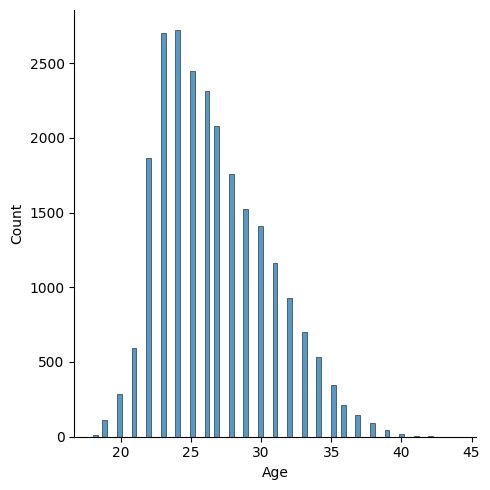

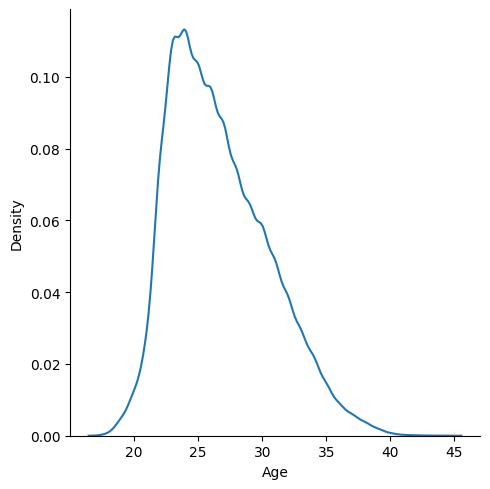

0.635217569169913


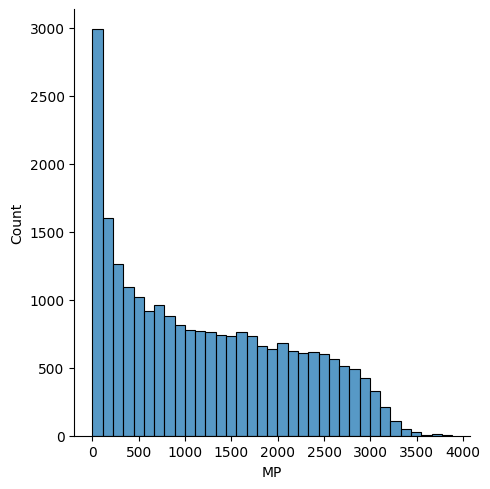

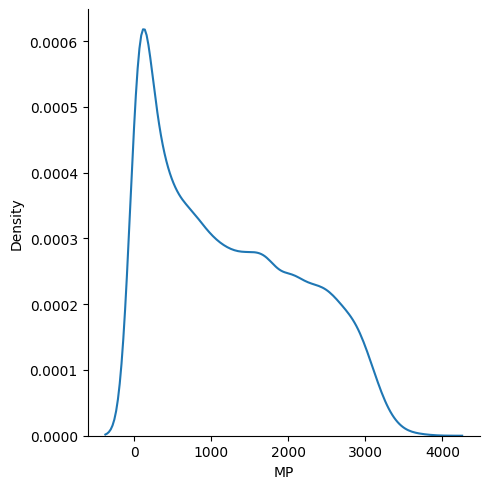

0.42625081947392074


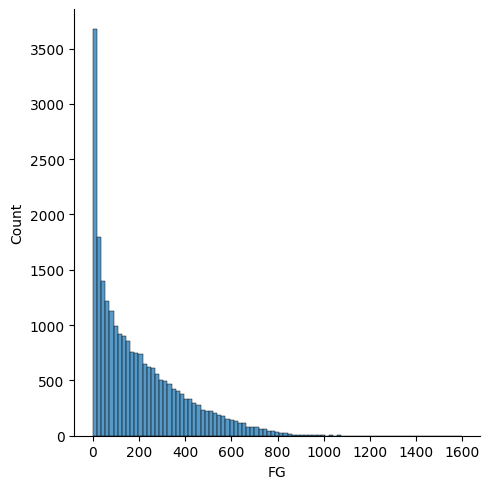

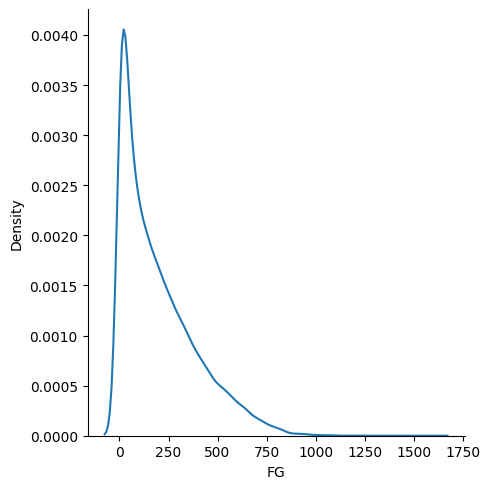

1.188833352611484


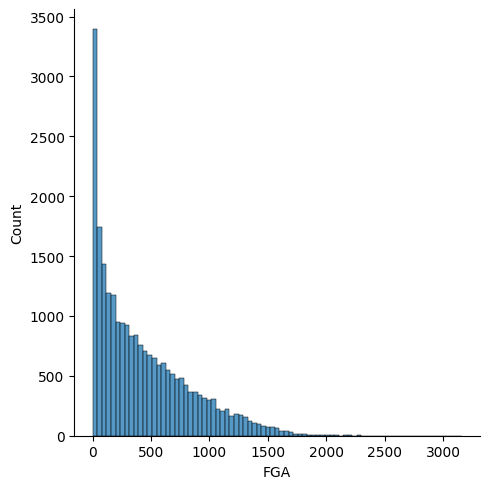

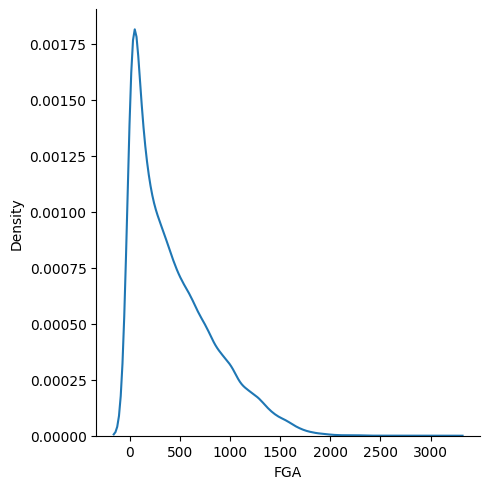

1.0826448903105994


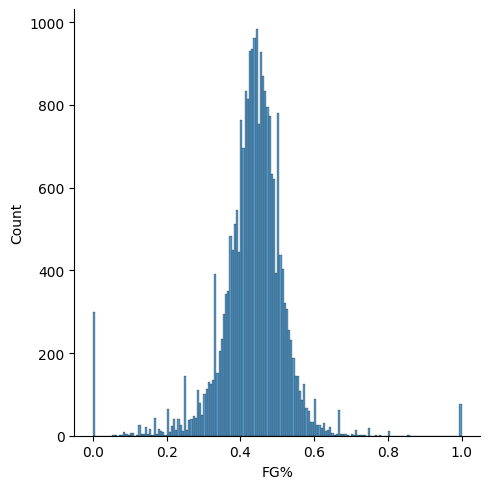

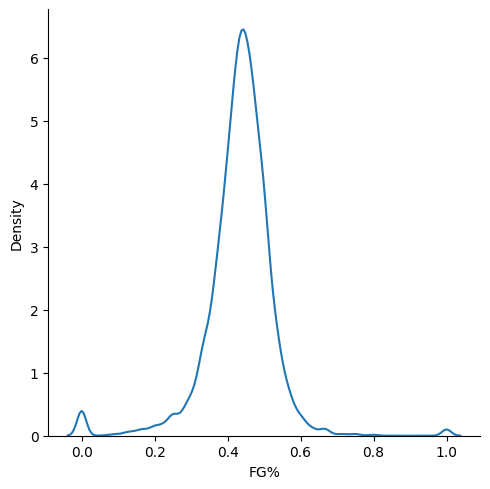

-0.646556068613295


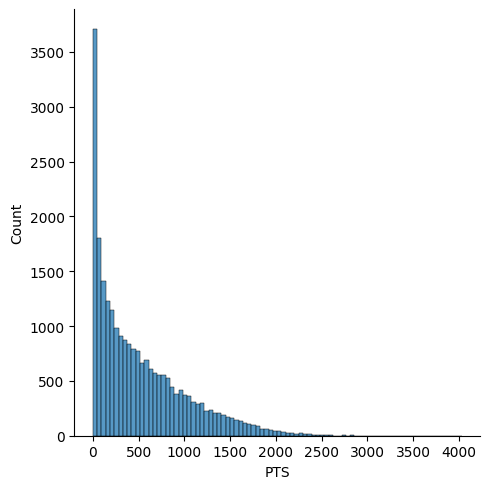

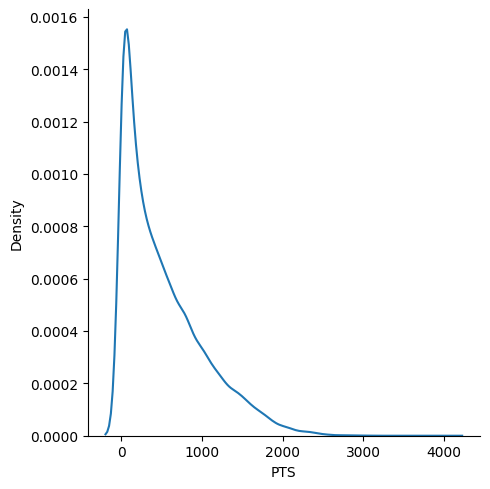

1.2050654799585492


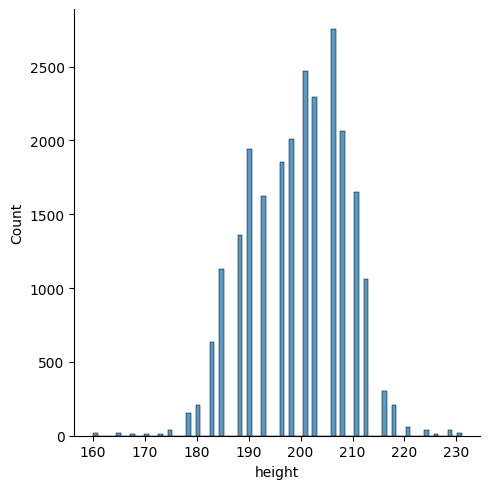

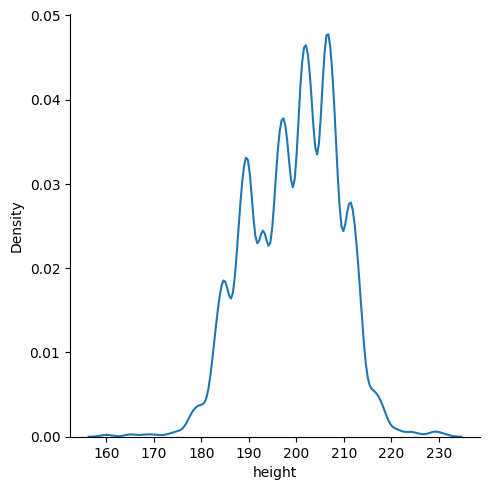

-0.2369275120442809


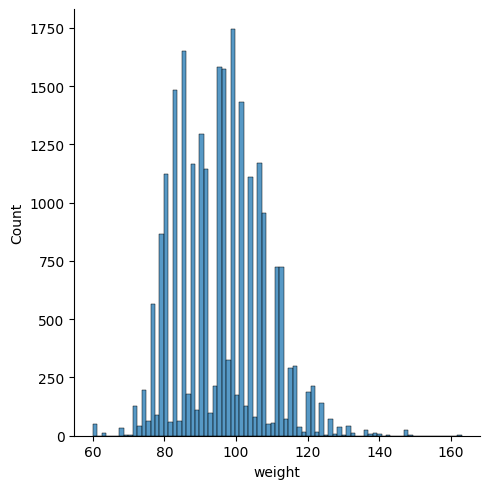

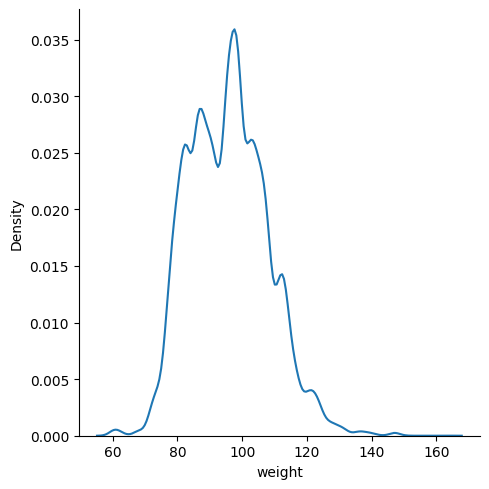

0.37844002232636725


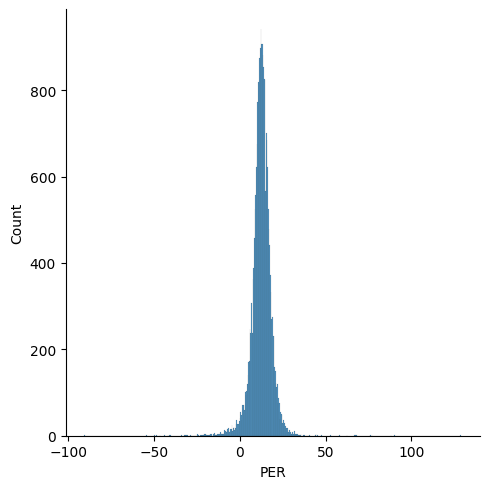

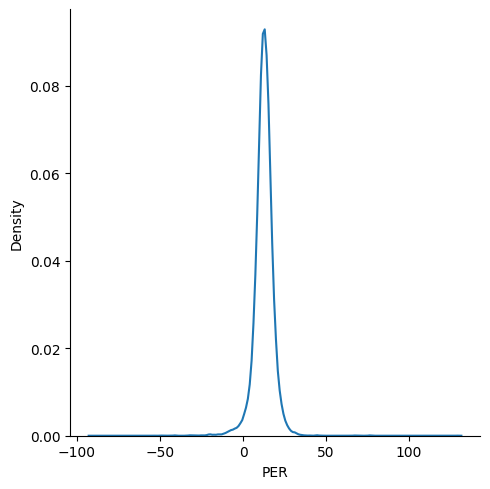

-0.44682143854087264


In [23]:
def univariante():
   feature= df.columns.to_list()
   for i in range(1,10):
     sns.displot(df,x= feature[i],kind='hist')
     sns.displot(df,x= feature[i],kind='kde')
    #  plt.xlabel(feature[i])
    #  plt.ylabel('count')
     plt.show()
     print(df[feature[i]].skew())
univariante()

## Bivariate analysis.

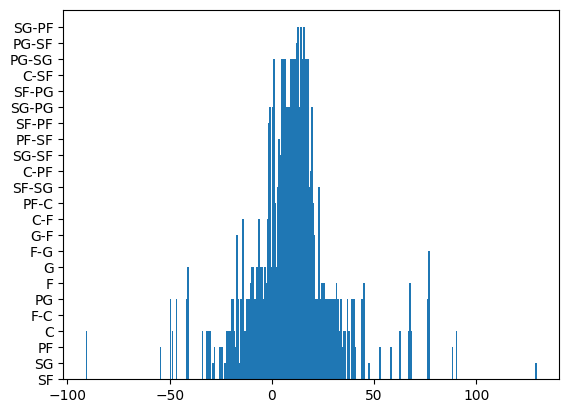

In [131]:
plt.bar(df['PER'],df['Pos'])
plt.show()

##Model Selection

In [36]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['PER']),df['PER'],test_size=0.2,random_state=42)

In [37]:
trf1 = ColumnTransformer([
    ('trf1',OneHotEncoder(sparse_output=False,drop='first',handle_unknown="ignore"),['Pos'])
],remainder='passthrough')

In [38]:
trf2= ColumnTransformer([
    ('trf2',MinMaxScaler(),[0,1,2,3,4,5,6,7])
],remainder='passthrough')

In [39]:
trf3 = SelectKBest(score_func=f_classif)

In [40]:
trf4= RandomForestRegressor()

In [41]:
pipe = make_pipeline(trf1,trf2,trf3,trf4)

In [42]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Pos'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf2', MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('selectkbest', SelectKBest()),
                ('randomforestregressor', RandomForestRegressor())])

In [43]:
y_pred = pipe.predict(X_test)

In [44]:
r2_score(y_test,y_pred)

0.710259768116819

In [45]:
df_encoded = pd.get_dummies(df.drop(columns=['PER']),columns=['Pos'],drop_first=True)

In [154]:
df_encoded.iloc[:,8:30]= df_encoded.iloc[:,8:30].astype('int')

In [158]:
scaler= MinMaxScaler()
df_encoded= scaler.fit_transform(df_encoded)

In [46]:
np.mean(cross_val_score(pipe,df.drop(columns=['PER']),df['PER'],scoring='r2',cv=5))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.7131731342120213

In [48]:
pickle.dump(pipe,open('pipe.pkl','wb'))
pipe = pickle.load(open('pipe.pkl','rb'))